MovieWriter imagemagick unavailable; using Pillow instead.


GIF saved at: billiard_simulation_with_circles.gif


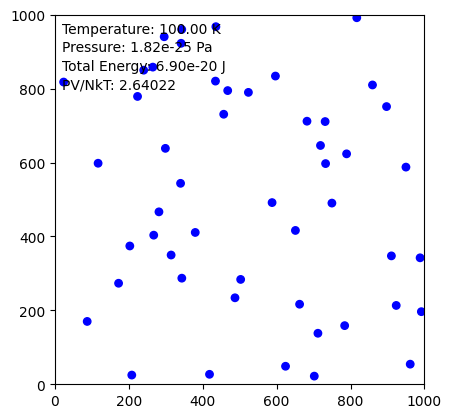

In [2]:
from billiard import BilliardModel
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle

# Initialize the Billiard Model
radius = 10
billiard_model = BilliardModel(number_of_particles=50, dimensions=2, size=1000, temperature=100, radius=radius, delta_t=0.5)

# Start the simulation and capture frames
frames = billiard_model.start_simulation(end_time=1000)

# Visualization setup
fig, ax = plt.subplots()

# Create a list to store circle objects for each particle
circles = [Circle((0, 0), radius, color='blue', fill=True) for _ in range(billiard_model.N)]
for circle in circles:
    ax.add_patch(circle)

temp_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
pressure_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)
energy_text = ax.text(0.02, 0.85, '', transform=ax.transAxes)
ratio_text = ax.text(0.02, 0.80, '', transform=ax.transAxes) 


# Axis limits
ax.set_xlim(0, billiard_model.size)
ax.set_ylim(0, billiard_model.size)
ax.set_aspect('equal', 'box')  # Ensure circles aren't distorted

# Initialization function for animation
def init():
    for circle in circles:
        circle.center = (0, 0)
    temp_text.set_text('')
    pressure_text.set_text('')
    energy_text.set_text('')
    return circles + [temp_text, pressure_text, energy_text]

# Update function for animation
def update(frame_data):
    for circle, position in zip(circles, frame_data["positions"]):
        circle.center = position
    temp_text.set_text('Temperature: {:.2f} K'.format(frame_data["temperature"]))
    pressure_text.set_text('Pressure: {:.2e} Pa'.format(frame_data["pressure"]))
    energy_text.set_text('Total Energy: {:.2e} J'.format(frame_data["total_energy"]))
    pv = frame_data["pressure"] * billiard_model.get_shape()
    NKT = billiard_model.N * billiard_model.k_B * frame_data["temperature"]
    ratio = pv / NKT  # Calculate the ratio
    ratio_text.set_text('PV/NkT: {:.5f}'.format(ratio))  # Display the ratio

    return circles + [temp_text, pressure_text, energy_text, ratio_text]  # Include the new text element in the return statement
# Create the animation
ani = FuncAnimation(fig, update, frames=frames, init_func=init, blit=False, interval=50)

# Save as GIF
gif_path = 'billiard_simulation_with_circles.gif'
ani.save(gif_path, writer='imagemagick')

print("GIF saved at:", gif_path)


In [1]:
from billiard import BilliardModel
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
import numpy as np
from matplotlib.figure import Figure

class MolecularDynamicsSimulator:
    def __init__(self, number_of_particles=200, dimensions=2, size=1000, temperature=200, radius=10, delta_t=0.5):
        self.billiard_model = BilliardModel(
            number_of_particles=number_of_particles,
            dimensions=dimensions,
            size=size,
            temperature=temperature,
            radius=radius,
            delta_t=delta_t
        )
        self.frames = []
        self.figure = Figure()

    def run_simulation(self, end_time=1000):
        self.frames = self.billiard_model.start_simulation(end_time=end_time)

    def animate_simulation_2d(self):
        fig = plt.figure()  # Clear the figure to reset it
        ax = fig.add_subplot(111)

        # Create a list to store circle objects for each particle
        circles = [Circle((0, 0), self.billiard_model.radius, color='blue', fill=True) for _ in range(self.billiard_model.N)]
        for circle in circles:
            ax.add_patch(circle)

        temp_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
        pressure_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)
        energy_text = ax.text(0.02, 0.85, '', transform=ax.transAxes)
        ratio_text = ax.text(0.02, 0.80, '', transform=ax.transAxes)

        # Axis limits
        ax.set_xlim(0, self.billiard_model.size)
        ax.set_ylim(0, self.billiard_model.size)
        ax.set_aspect('equal', 'box')  # Ensure circles aren't distorted

        # Initialization function for 2D animation
        def init():
            for circle in circles:
                circle.center = (0, 0)
            temp_text.set_text('')
            pressure_text.set_text('')
            energy_text.set_text('')
            return circles + [temp_text, pressure_text, energy_text]

        # Update function for 2D animation
        def update(frame_data):
            for circle, position in zip(circles, frame_data["positions"]):
                circle.center = position
            temp_text.set_text('Temperature: {:.2f} K'.format(frame_data["temperature"]))
            pressure_text.set_text('Pressure: {:.2e} Pa'.format(frame_data["pressure"]))
            energy_text.set_text('Total Energy: {:.2e} J'.format(frame_data["total_energy"]))
            pv = frame_data["pressure"] * self.billiard_model.get_shape()
            NKT = self.billiard_model.N * self.billiard_model.k_B * frame_data["temperature"]
            ratio = pv / NKT  # Calculate the ratio
            ratio_text.set_text('PV/NkT: {:.5f}'.format(ratio))  # Display the ratio

            return circles + [temp_text, pressure_text, energy_text, ratio_text]

        # Create the 2D animation
        ani = FuncAnimation(fig, update, frames=self.frames, init_func=init, blit=False, interval=50)

        # Save 2D animation as GIF
        gif_path_2d = 'billiard_simulation_2d.gif'
        ani.save(gif_path_2d, writer='pillow')

        print("2D GIF saved at:", gif_path_2d)
        return fig, ani

    def animate_simulation_3d(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        spheres = [ax.plot([], [], [], 'o', markersize=self.billiard_model.radius)[0] for _ in range(self.billiard_model.N)]
        
        text_properties = {
            'horizontalalignment': 'left',
            'verticalalignment': 'center',
            'fontsize': 9,
            'bbox': {'facecolor': 'white', 'alpha': 0.7, 'pad': 4}
        }

        # Move text further to the left by reducing the x coordinate
        temp_text = ax.text2D(0.01, 0.97, '', transform=ax.transAxes, **text_properties)
        pressure_text = ax.text2D(0.01, 0.88, '', transform=ax.transAxes, **text_properties)
        energy_text = ax.text2D(0.01, 0.1, '', transform=ax.transAxes, **text_properties)
        ratio_text = ax.text2D(0.01, 0, '', transform=ax.transAxes, **text_properties)

        ax.set_xlim(0, self.billiard_model.size)
        ax.set_ylim(0, self.billiard_model.size)
        ax.set_zlim(0, self.billiard_model.size)

        # Initialization function for 3D animation
        def init():
            for sphere in spheres:
                sphere.set_data([], [])
                sphere.set_3d_properties([])
            temp_text.set_text('')
            pressure_text.set_text('')
            energy_text.set_text('')
            return spheres + [temp_text, pressure_text, energy_text]

        # Update function for 3D animation
        def update(frame_data):
            for sphere, position in zip(spheres, frame_data["positions"]):
                sphere.set_data(position[0], position[1])
                sphere.set_3d_properties(position[2])
            temp_text.set_text('Temperature: {:.2f} K'.format(frame_data["temperature"]))
            pressure_text.set_text('Pressure: {:.2e} Pa'.format(frame_data["pressure"]))
            energy_text.set_text('Total Energy: {:.2e} J'.format(frame_data["total_energy"]))
            pv = frame_data["pressure"] * self.billiard_model.get_shape()
            NKT = self.billiard_model.N * self.billiard_model.k_B * frame_data["temperature"]
            ratio = pv / NKT  # Calculate the ratio
            ratio_text.set_text('PV/NkT: {:.5f}'.format(ratio))  # Display the ratio

            return spheres + [temp_text, pressure_text, energy_text, ratio_text]

        # Create the 3D animation
        ani = FuncAnimation(fig, update, frames=self.frames, init_func=init, blit=False, interval=50)

        # Save 3D animation as GIF
        gif_path_3d = 'billiard_simulation_3d.gif'
        ani.save(gif_path_3d, writer='pillow')

        print("3D GIF saved at:", gif_path_3d)
        return fig, ani
    



# Usage example:
# simulator = MolecularDynamicsSimulator(dimensions=3)
# simulator.run_simulation(end_time=1000)
# #simulator.animate_simulation_2d()
# simulator.animate_simulation_3d()


In [1]:
from billiard import BilliardModel
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
import numpy as np
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
import numpy as np

class MolecularDynamicsSimulator:
    def __init__(self, number_of_particles=200, dimensions=2, size=1000, temperature=200, radius=10, delta_t=0.5):
        self.billiard_model = BilliardModel(
            number_of_particles=number_of_particles,
            dimensions=dimensions,
            size=size,
            temperature=temperature,
            radius=radius,
            delta_t=delta_t
        )
        self.frames = []

    def run_simulation(self, end_time=1000):
        self.frames = self.billiard_model.start_simulation(end_time=end_time)

    def animate_simulation_2d(self):
        fig = plt.figure()
        ax = fig.add_subplot(111)

        circles = [Circle((0, 0), self.billiard_model.radius, color='blue', fill=True) for _ in range(self.billiard_model.N)]
        for circle in circles:
            ax.add_patch(circle)

        temp_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
        pressure_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)
        energy_text = ax.text(0.02, 0.85, '', transform=ax.transAxes)
        ratio_text = ax.text(0.02, 0.80, '', transform=ax.transAxes)

        ax.set_xlim(0, self.billiard_model.size)
        ax.set_ylim(0, self.billiard_model.size)
        ax.set_aspect('equal', 'box')

        def init():
            for circle in circles:
                circle.center = (0, 0)
            temp_text.set_text('')
            pressure_text.set_text('')
            energy_text.set_text('')
            return circles + [temp_text, pressure_text, energy_text]

        def update(frame_data):
            for circle, position in zip(circles, frame_data["positions"]):
                circle.center = position
            temp_text.set_text('Temperature: {:.2f} K'.format(frame_data["temperature"]))
            pressure_text.set_text('Pressure: {:.2e} Pa'.format(frame_data["pressure"]))
            energy_text.set_text('Total Energy: {:.2e} J'.format(frame_data["total_energy"]))
            pv = frame_data["pressure"] * self.billiard_model.get_shape()
            NKT = self.billiard_model.N * self.billiard_model.k_B * frame_data["temperature"]
            ratio = pv / NKT
            ratio_text.set_text('PV/NkT: {:.5f}'.format(ratio))

            return circles + [temp_text, pressure_text, energy_text, ratio_text]

        ani = FuncAnimation(fig, update, frames=self.frames, init_func=init, blit=False, interval=50)

        gif_path_2d = 'billiard_simulation_2d.gif'
        ani.save(gif_path_2d, writer='pillow')
        print("2D GIF saved at:", gif_path_2d)
        return fig, ani

    def animate_simulation_3d(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        spheres = [ax.plot([], [], [], 'o', markersize=self.billiard_model.radius)[0] for _ in range(self.billiard_model.N)]
        
        text_properties = {
            'horizontalalignment': 'left',
            'verticalalignment': 'center',
            'fontsize': 9,
            'bbox': {'facecolor': 'white', 'alpha': 0.7, 'pad': 4}
        }

        temp_text = ax.text2D(0.01, 0.97, '', transform=ax.transAxes, **text_properties)
        pressure_text = ax.text2D(0.01, 0.88, '', transform=ax.transAxes, **text_properties)
        energy_text = ax.text2D(0.01, 0.1, '', transform=ax.transAxes, **text_properties)
        ratio_text = ax.text2D(0.01, 0, '', transform=ax.transAxes, **text_properties)

        ax.set_xlim(0, self.billiard_model.size)
        ax.set_ylim(0, self.billiard_model.size)
        ax.set_zlim(0, self.billiard_model.size)

        def init():
            for sphere in spheres:
                sphere.set_data([], [])
                sphere.set_3d_properties([])
            temp_text.set_text('')
            pressure_text.set_text('')
            energy_text.set_text('')
            return spheres + [temp_text, pressure_text, energy_text]

        def update(frame_data):
            for sphere, position in zip(spheres, frame_data["positions"]):
                sphere.set_data(position[0], position[1])
                sphere.set_3d_properties(position[2])
            temp_text.set_text('Temperature: {:.2f} K'.format(frame_data["temperature"]))
            pressure_text.set_text('Pressure: {:.2e} Pa'.format(frame_data["pressure"]))
            energy_text.set_text('Total Energy: {:.2e} J'.format(frame_data["total_energy"]))
            pv = frame_data["pressure"] * self.billiard_model.get_shape()
            NKT = self.billiard_model.N * self.billiard_model.k_B * frame_data["temperature"]
            ratio = pv / NKT
            ratio_text.set_text('PV/NkT: {:.5f}'.format(ratio))

            return spheres + [temp_text, pressure_text, energy_text, ratio_text]

        ani = FuncAnimation(fig, update, frames=self.frames, init_func=init, blit=False, interval=50)

        gif_path_3d = 'billiard_simulation_3d.gif'
        ani.save(gif_path_3d, writer='pillow')
        print("3D GIF saved at:", gif_path_3d)
        return fig, ani
    def run_tk(self):
        # Create main window
        root = tk.Tk()
        root.wm_title("Billiard Model Simulation")
        delta_t_slider = tk.Scale(root, from_=0.001, to=10, resolution=0.001, orient=tk.HORIZONTAL, label="Delta t")
        delta_t_slider.set(self.billiard_model.delta_t)
        delta_t_slider.pack()

        # Create a figure for the plot
        fig = Figure(figsize=(5, 4), dpi=100)
        ax = fig.add_subplot(111)

        # Code for creating circles and texts
        circles = [Circle((0, 0), self.billiard_model.radius, color='blue', fill=True) for _ in range(self.billiard_model.N)]
        for circle in circles:
            ax.add_patch(circle)

        temp_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
        pressure_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)
        energy_text = ax.text(0.02, 0.85, '', transform=ax.transAxes)
        ratio_text = ax.text(0.02, 0.80, '', transform=ax.transAxes)

        ax.set_xlim(0, self.billiard_model.size)
        ax.set_ylim(0, self.billiard_model.size)
        ax.set_aspect('equal', 'box')

        # Initialization function
        def init():
            for circle in circles:
                circle.center = (0, 0)
            temp_text.set_text('')
            pressure_text.set_text('')
            energy_text.set_text('')
            return circles + [temp_text, pressure_text, energy_text]

        frame_generator = self.billiard_model.real_time_simulation()  # Get the generator

        # Update function
        def update(_):
            try:
                self.billiard_model.update_delta_t(delta_t_slider.get())
                frame_data = next(frame_generator)
                for circle, position in zip(circles, frame_data["positions"]):
                    circle.center = position
                temp_text.set_text('Temperature: {:.2f} K'.format(frame_data["temperature"]))
                pressure_text.set_text('Pressure: {:.2e} Pa'.format(frame_data["pressure"]))
                energy_text.set_text('Total Energy: {:.2e} J'.format(frame_data["total_energy"]))
                pv = frame_data["pressure"] * self.billiard_model.get_shape()
                NKT = self.billiard_model.N * self.billiard_model.k_B * frame_data["temperature"]
                ratio = pv / NKT
                ratio_text.set_text('PV/NkT: {:.5f}'.format(ratio))

                return circles + [temp_text, pressure_text, energy_text, ratio_text]
            except StopIteration:
                return  # If no more frames, end the animation
        

        # Embedding the figure in the Tkinter window
        canvas = FigureCanvasTkAgg(fig, master=root)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        ani = FuncAnimation(fig, update, init_func=init, blit=False, interval=50)
        # Start the Tkinter event loop
        tk.mainloop()




# Usage example:
# simulator = MolecularDynamicsSimulator(dimensions=3)
# simulator.run_simulation(end_time=1000)
# # To animate 2D simulation, uncomment the next line
# # simulator.animate_simulation_2d()
# To animate 3D simulation, uncomment the next line
# simulator.animate_simulation_3d()


In [2]:
sim = MolecularDynamicsSimulator()

sim.run_tk()

/var/folders/xh/z5gsc60d3_g6xpyqpzc139f40000gn/T/ipykernel_49544/788843871.py:187: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, init_func=init, blit=False, interval=50)


200 1.38064852e-23 200.0 5.52259408e-19 5.52259408e-19
200 1.38064852e-23 200.00000000000003 5.522594080000001e-19 5.52259408e-19
200 1.38064852e-23 200.00000000000003 5.522594080000001e-19 5.52259408e-19
200 1.38064852e-23 200.0 5.52259408e-19 5.52259408e-19
200 1.38064852e-23 200.00000000000003 5.522594080000001e-19 5.52259408e-19
200 1.38064852e-23 200.00000000000003 5.522594080000001e-19 5.52259408e-19
200 1.38064852e-23 200.0 5.52259408e-19 5.52259408e-19
200 1.38064852e-23 200.0 5.52259408e-19 5.52259408e-19
200 1.38064852e-23 199.99999999999997 5.522594079999999e-19 5.52259408e-19
200 1.38064852e-23 199.99999999999991 5.522594079999998e-19 5.52259408e-19
200 1.38064852e-23 200.0 5.52259408e-19 5.52259408e-19
200 1.38064852e-23 199.99999999999997 5.522594079999999e-19 5.52259408e-19
200 1.38064852e-23 200.0 5.52259408e-19 5.52259408e-19
200 1.38064852e-23 200.0 5.52259408e-19 5.52259408e-19
200 1.38064852e-23 199.99999999999997 5.522594079999999e-19 5.52259408e-19
200 1.38064852e

In [12]:
from numpy import arange, sin, pi
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import tkinter as Tk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#---------End of imports

fig = plt.Figure()

x = np.arange(0, 2*np.pi, 0.01)        # x-array

def animate(i):
    line.set_ydata(np.sin(x+i/10.0))  # update the data
    return line,

root = Tk.Tk()

label = Tk.Label(root,text="SHM Simulation").grid(column=0, row=0)

canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().grid(column=0,row=1)

ax = fig.add_subplot(111)
line, = ax.plot(x, np.sin(x))
ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), interval=25, blit=False)

Tk.mainloop()

KeyboardInterrupt: 